### Logistic Regression scratch

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

### load the iris dataset

In [203]:
data = datasets.load_iris()

In [204]:
iris_data = pd.DataFrame(data = data.data[:,0:2], columns = ["Sepal Length (cm)", "Sepal Width (cm)"])
iris_label = pd.DataFrame(data = iris.target,columns = ["Target"])

In [205]:
df = pd.concat([iris_data, iris_label], axis = 1)
df.head()

,Sepal Length (cm),Sepal Width (cm),Target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [206]:
X = iris.data[:,:2]
y = (iris.target !=0)*1


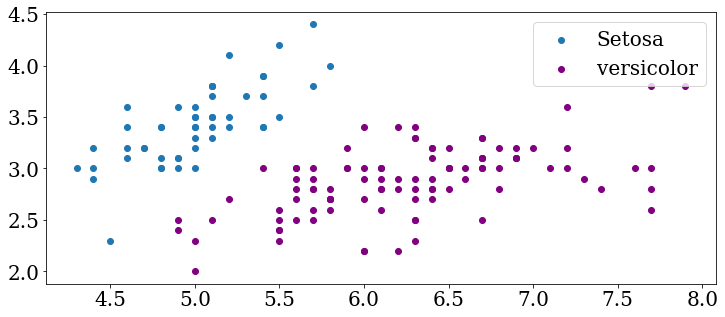

In [207]:
plt.figure(figsize = (12,5))
plt.scatter(X[Y==0][:,0], X[Y==0][:,1],label='Setosa')
plt.scatter(X[Y==1][:,0],X[Y==1][:,1], color = "purple",label = "versicolor")
plt.legend()

In [208]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [209]:
X = add_intercept(X)

### Sigmoid Function

In [210]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Let's plot the sigmoid function

In [211]:
# Try random values

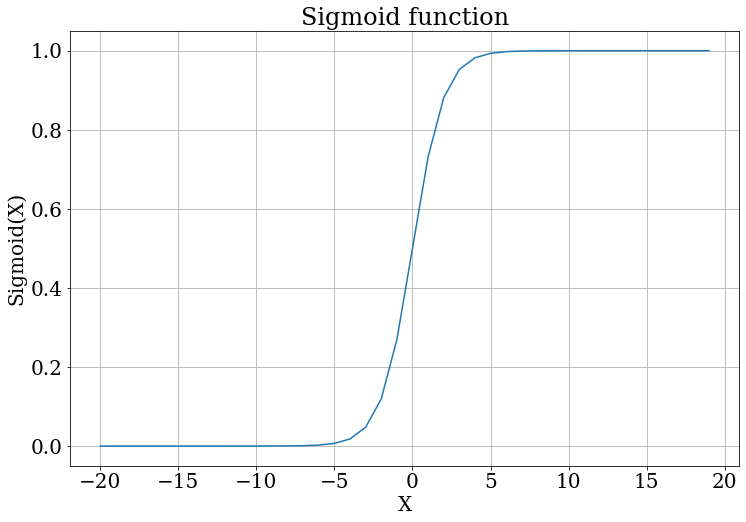

In [212]:
plt.figure(figsize = (12,8))
plt.title("Sigmoid function")
temp = np.arange(-20.0,20)
temp_label = sigmoid(temp)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.rc('font', family='serif', size =20)
plt.plot(temp, temp_label)
plt.show()

### Cost Function

In [213]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

### Plotting the cost function

/tmp/ipykernel_36123/3403616486.py:5: RuntimeWarning: divide by zero encountered in log
  ax.plot(test_me, np.multiply(1,-np.log(test_me)),c = 'purple',label = "y = 1")


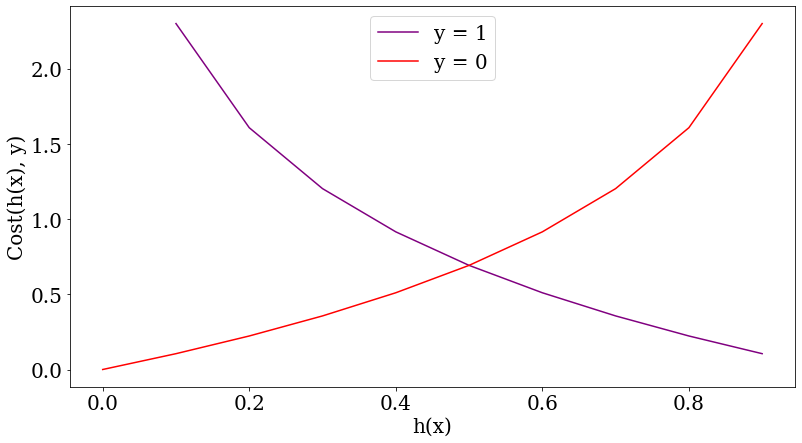

In [214]:
test_me = np.arange(0,1,step = 0.1)

fig, ax = plt.subplots(figsize = (13,7))

ax.plot(test_me, np.multiply(1,-np.log(test_me)),c = 'purple',label = "y = 1")
ax.plot(test_me, np.multiply(1,-np.log(1-test_me)),c = 'red',label = "y = 0")
ax.set_xlabel('h(x)')
ax.set_ylabel('Cost(h(x), y)')
ax.legend(loc='upper center')
plt.legend(loc = 'upper center')

In [215]:
 lr = 0.001

#### Gradient Descent


In [233]:
def gradient_descent(X, y):   
    # weights initialization
    theta = np.zeros(X.shape[1])
    sack = dict()
        
    for i in range(100000):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= lr * gradient
            
        z = np.dot(X,theta)
        h = sigmoid(z)
        loss = cost(h, y)
                
        if i % 1000 == 0:
            
            sack[i] = loss
            print(f'cost: {loss} \t', f'weights: {theta} \t')
    return sack
        
    

In [234]:
gdescent = gradient_descent(X,Y)

cost: 0.6914099226877233 	 weights: [0.00016667 0.001253   0.000386  ] 	
cost: 0.5645651655951356 	 weights: [-0.00722106  0.21476505 -0.14231218] 	
cost: 0.5200804242997639 	 weights: [-0.03087317  0.31550742 -0.32604849] 	
cost: 0.4814743741974171 	 weights: [-0.05299254  0.40997831 -0.49686249] 	
cost: 0.4478885089996293 	 weights: [-0.07373735  0.49860275 -0.65588799] 	
cost: 0.41856285471573207 	 weights: [-0.09325465  0.5818284  -0.80423992] 	
cost: 0.3928431591433961 	 weights: [-0.11167648  0.66010357 -0.94296721] 	
cost: 0.37017600657592664 	 weights: [-0.12911948  0.73385871 -1.07303078] 	
cost: 0.35009811484568465 	 weights: [-0.14568579  0.80349588 -1.19529609] 	
cost: 0.33222372753675233 	 weights: [-0.16146443  0.86938392 -1.31053443] 	
cost: 0.3162322390162532 	 weights: [-0.17653292  0.93185727 -1.41942885] 	
cost: 0.3018570484717896 	 weights: [-0.19095881  0.99121689 -1.52258233] 	
cost: 0.28887598400833464 	 weights: [-0.2048011   1.04773249 -1.62052655] 	
cost: 0.27

#### Gradient Descent Graph

Text(0.5, 0, 'Number of Iterations')

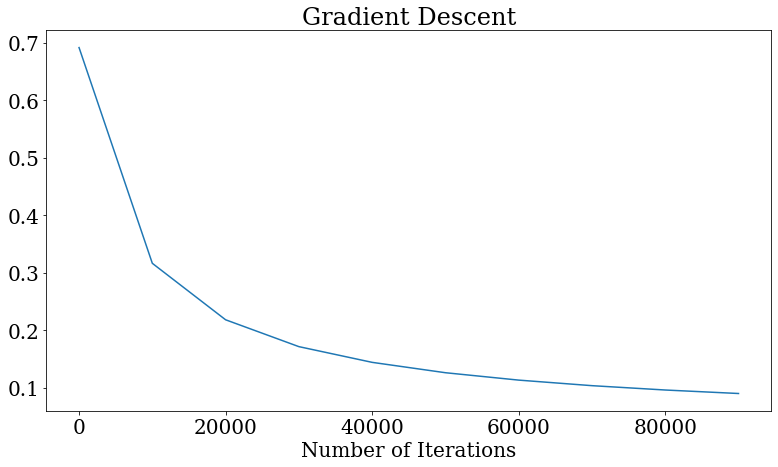

In [229]:
iters = gdescent.keys()
curr_cost = gdescent.values()

fig, ax = plt.subplots(figsize = (13,7))
ax.plot(iters, curr_cost)
ax.set_title('Gradient Descent')
ax.set_xlabel('Number of Iterations')

### Prediction

In [236]:
def predict(X, theta):
    
    final_pred = sigmoid(np.dot(x,theta))
    return final_pred.round()